# **REDUCE MODEL COMPLEXITY**

In [2]:
import os

os.chdir("/content/drive/MyDrive/Deep_Learning/vanishing_gradient_problem")
os.getcwd()

'/content/drive/MyDrive/Deep_Learning/vanishing_gradient_problem'

In [3]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [4]:
X,y = make_moons(n_samples=250, noise=0.05, random_state=42)
X.shape

(250, 2)

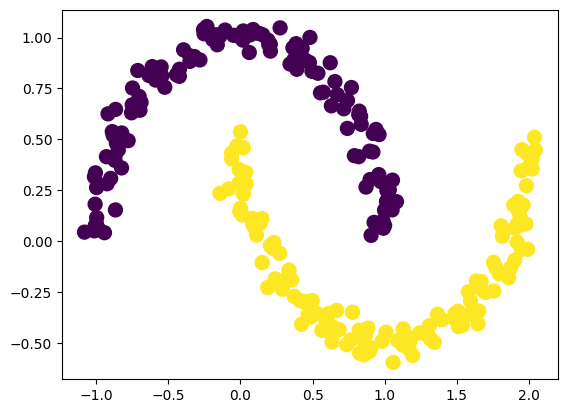

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.show()

In [6]:
model = Sequential()

model.add(Dense(10, activation='sigmoid', input_dim = 2))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))


Here we have reduced the model's complexity by removing extra hidden layers

In [7]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [8]:
old_weights = model.get_weights()[0]
old_weights

array([[ 0.0152204 , -0.47533366, -0.28235337,  0.3406133 , -0.2921092 ,
        -0.68527335, -0.47611272, -0.43112347,  0.6020706 , -0.30920395],
       [ 0.6510673 , -0.6571351 , -0.2792281 ,  0.44043761, -0.60072035,
         0.20404047,  0.23628604,  0.67282254,  0.48188955,  0.20555049]],
      dtype=float32)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
history = model.fit(x=X_train, y=y_train, epochs=100, verbose=1)

Epoch 1/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5100
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6914 - accuracy: 0.5100
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.5100
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6912 - accuracy: 0.5100
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5100
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5100
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5100
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5100
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.5100
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.5100
Epoch 11/100
7/7 [===========

In [12]:
new_weights = model.get_weights()[0]

percentage_change_in_weight = abs(100*(new_weights - old_weights)/old_weights)
percentage_change_in_weight

array([[2391.2979  ,   95.40489 ,  218.60425 ,  175.1409  ,   57.568512,
          35.303127,   69.00915 ,   38.14497 ,  115.716354,  178.30719 ],
       [ 189.35713 ,  181.9942  ,  534.59924 ,  324.20197 ,  152.28471 ,
         648.9752  ,  602.59204 ,  173.84256 ,  293.3433  ,  655.2975  ]],
      dtype=float32)

See very big changes are done in the weights

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

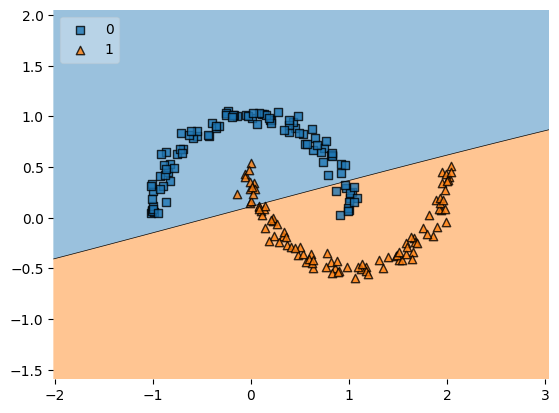

In [13]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train.astype('int'), clf = model, legend = 2)

Our model has performed well and is actually learning something

#### Is it a viable option?
No, because for a large dataset having high-dimensional data reducing layers would result in a shallow neural network